### Normalizing Data

* Want to scale the individual data observations (i.e. rows)
* Rescales the data in smaller range -1.0 to 1.0 or 0.0 to 1.0.
* Used in classification Problems and data mining 
* when clustering data we need to apply L2 normalization to each row
* L2 normalization applied to a particular row of a data array 
* L2 norm of a row is just the square root of the sum of squared values for the row

![norm.PNG](normal.PNG)
[dataset](https://raw.githubusercontent.com/APSSDC-Data-Analysis/Data-Analysis-B3-Afternoon/master/D6_Preprocessing(29Aug2020)/HomeBuyer.csv)

### Robust Scaling
* Deal with is outliers (data point that is significantly further away from the other data points)
* Robustly scale the data, i.e. avoid being affected by outliers
* Scaling by using data's median and Interquartile Range (IQR)
* Here mean affected but median remains same
* Subtract the median from each data value then scale to the IQR

[dataset_link](https://raw.githubusercontent.com/APSSDC-Data-Analysis/Data-Analysis-B3-Afternoon/master/D5_Analysis%26Preprocessing/Advertising.csv)

In [4]:
from sklearn.preprocessing import scale

In [2]:
# data range
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.preprocessing import Normalizer

In [ ]:
data["Tv"]
data["radio"]

In [7]:
import pandas as pd

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/Data-Analysis-B3-Afternoon/master/D6_Preprocessing(29Aug2020)/HomeBuyer.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
norm_data = Normalizer()
n_data = norm_data.fit_transform(data)

In [20]:
# ndarry into df
n_data = pd.DataFrame(n_data)
n_data.columns = data.columns
n_data

,Age,EstimatedSalary,Purchased
0,0.001000,1.000000,0.000000
1,0.001750,0.999998,0.000000
2,0.000605,1.000000,0.000000
3,0.000474,1.000000,0.000000
4,0.000250,1.000000,0.000000
...,...,...,...
395,0.001122,0.999999,0.000024
396,0.002217,0.999998,0.000043
397,0.002500,0.999997,0.000050
398,0.001091,0.999999,0.000000


In [22]:
n_data.max(),data.max()

(Age                0.002522
 EstimatedSalary    1.000000
 Purchased          0.000050
 dtype: float64,
 Age                    60
 EstimatedSalary    150000
 Purchased               1
 dtype: int64)

In [23]:
n_data.min(),data.min()

(Age                0.000196
 EstimatedSalary    0.999997
 Purchased          0.000000
 dtype: float64,
 Age                   18
 EstimatedSalary    15000
 Purchased              0
 dtype: int64)

# Robust scaling

In [24]:
from sklearn.preprocessing import RobustScaler

In [137]:
data = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/Data-Analysis-B3-Afternoon/master/D5_Analysis%26Preprocessing/Advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

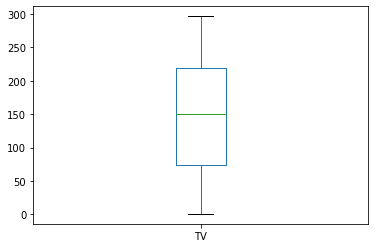

In [32]:
data["TV"].plot(kind = "box")

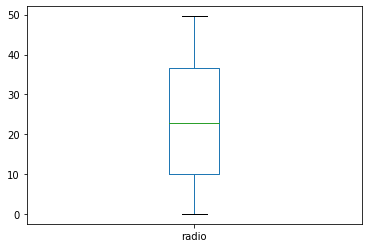

In [34]:
data["radio"].plot(kind = "box")


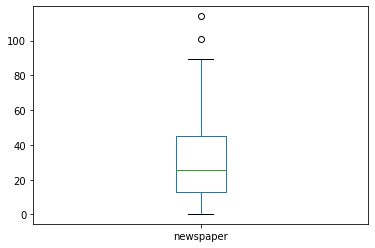

In [33]:
data["newspaper"].plot(kind = "box")

In [43]:
sorted(data["newspaper"])[-3]

89.4

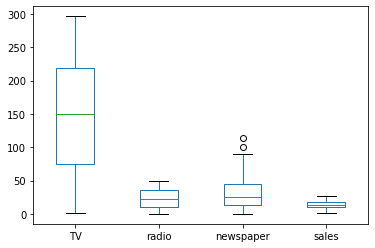

In [39]:
data.plot(kind= "box")

In [56]:
rs_data = RobustScaler()
rs_data = rs_data.fit_transform(data)
rs_data

array([[ 5.56247837e-01,  5.61205273e-01,  1.34312210e+00,
         1.30960854e+00],
       [-7.28625822e-01,  6.17702448e-01,  5.98145286e-01,
        -3.55871886e-01],
       [-9.17618553e-01,  8.66290019e-01,  1.34621329e+00,
        -5.12455516e-01],
       [ 1.21149187e-02,  6.93032015e-01,  1.01236476e+00,
         7.97153025e-01],
       [ 2.14953271e-01, -4.55743879e-01,  1.00927357e+00,
         0.00000000e+00],
       [-9.76462444e-01,  9.79284369e-01,  1.52241113e+00,
        -8.11387900e-01],
       [-6.38629283e-01,  3.72881356e-01, -6.95517774e-02,
        -1.56583630e-01],
       [-2.04569055e-01, -1.24293785e-01, -4.37403400e-01,
         4.27046263e-02],
       [-9.77154725e-01, -7.83427495e-01, -7.65069552e-01,
        -1.15302491e+00],
       [ 3.46486674e-01, -7.64595104e-01, -1.40649150e-01,
        -3.27402135e-01],
       [-5.79093112e-01, -6.44067797e-01, -4.79134467e-02,
        -6.12099644e-01],
       [ 4.49636552e-01,  4.14312618e-02, -6.72333849e-01,
      

In [52]:
rs_data = pd.DataFrame(rs_data,columns = data.columns)
rs_data

,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000
...,...,...,...,...
195,-0.772240,-0.723164,-0.369397,-0.754448
196,-0.384562,-0.677966,-0.545595,-0.455516
197,0.188647,-0.512241,-0.598145,-0.014235
198,0.926618,0.719397,1.250386,1.793594


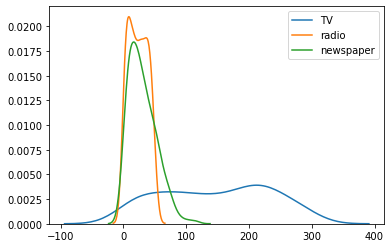

In [53]:
sns.kdeplot(data["TV"])
sns.kdeplot(data["radio"])
sns.kdeplot(data["newspaper"])

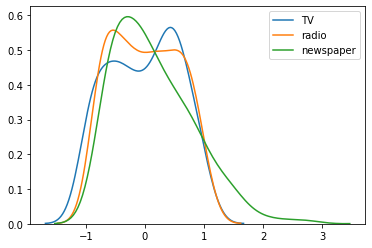

In [54]:
sns.kdeplot(rs_data["TV"])
sns.kdeplot(rs_data["radio"])
sns.kdeplot(rs_data["newspaper"])

# Visualization
Version check

* Line plot
* Scatter Plot
* Histogram
* Bar Graph
* Pie Chart
* Box Plot
* Image reading

![l](scatter.png)

csv excel html json tsv df ----
graphs/plots --
images/videos  --- 

2 girls and 3 boys -- img 
graphs
excel

In [57]:
import matplotlib

In [58]:
matplotlib.__version__

'3.2.2'

# Scatter Plot

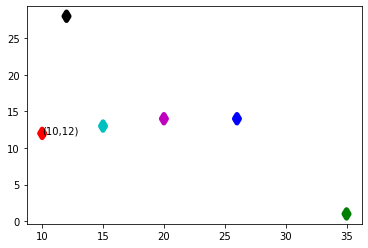

In [71]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
x = [10,15,20,35,26,12]
y = [12,13,14,1,14,28]
plt.scatter(x,y,marker = "d",color = ["r","c","m","g","b","black"],linewidth = 5)
plt.text(10,12,"(10,12)")
plt.show()

In [72]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : scalar or array-like, shape (n, )
        The data positions.
    
    s : scalar or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single 

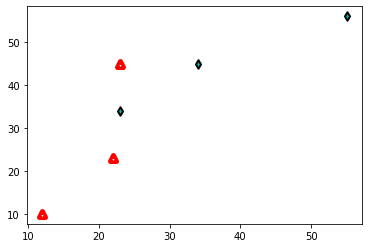

In [92]:
x1 = [12,22,23]
y1 = [10,23,45]
x2 = [23,34,55]
y2 = [34,45,56]
plt.scatter(x1,y1,marker= "^",linewidths=5,color = "w",edgecolor="red")
plt.scatter(x2,y2,marker = "d",linewidths=2,color = "c",edgecolor="black")
plt.show()

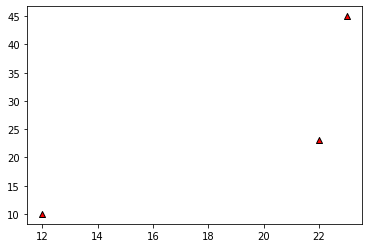

In [91]:
plt.scatter(x1,y1,marker='^',linewidth=1,color='r',edgecolor='black')


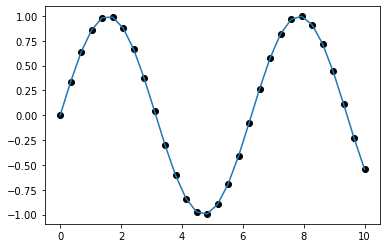

In [98]:
import numpy as np
x = np.linspace(0,10,30)
y = np.sin(x)
plt.plot(x,y)
plt.scatter(x,y,color = "black")
plt.show()

# Bar Graph

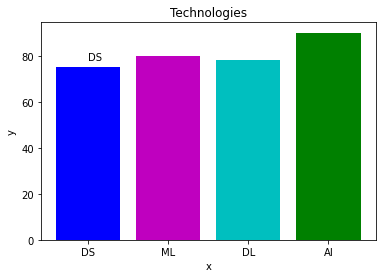

In [104]:
x = ["DS","ML","DL","AI"]
y = [75,80,78,90]
plt.bar(x,y,color = ["b","m","c","g"])
plt.text(0,78,"DS")
plt.title("Technologies")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<BarContainer object of 4 artists>

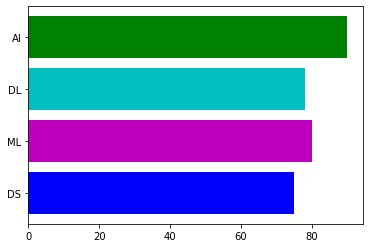

In [107]:
x = ["DS","ML","DL","AI"]
y = [75,80,78,90]
plt.barh(x,y,color = ["b","m","c","g"])


# Histograms

In [109]:
data =  pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/Data-Analysis-B3-Afternoon/master/D6_Preprocessing(29Aug2020)/HomeBuyer.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [110]:
data["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

(array([257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

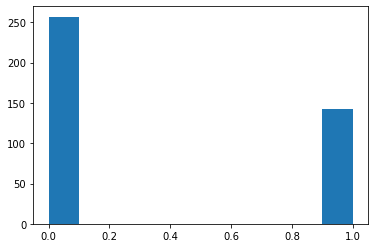

In [111]:
plt.hist(data["Purchased"])

(array([3., 0., 0., 2., 0., 0., 0., 1., 0., 1.]),
 array([10. , 12.7, 15.4, 18.1, 20.8, 23.5, 26.2, 28.9, 31.6, 34.3, 37. ]),
 <a list of 10 Patch objects>)

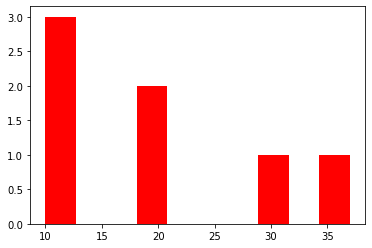

In [115]:
x = [10,20,30,10,37,20,10]
plt.hist(x,color = "r")

# Pie chart

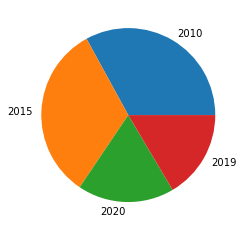

In [118]:
year = [2010,2015,2020,2019]
per = [90,89,49,45]
plt.pie(per,labels = year)
plt.show()

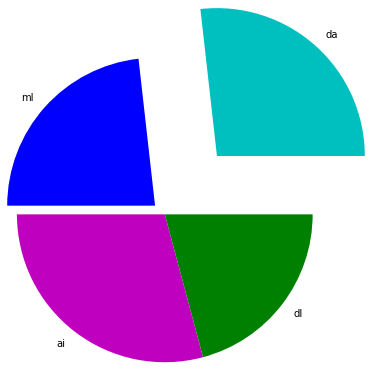

In [135]:
sub = ["da","ml","ai","dl"]
per = [90,78,98,70]
plt.pie(per,labels = sub,colors = ["c","b","m","g"],radius=1.7,explode=[0.9,0.15,0,0])
plt.show()

In [ ]:
colors - 0 - 255  -- # hexa values 

In [136]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

# Box Plot

In [138]:
data = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/Data-Analysis-B3-Afternoon/master/D5_Analysis%26Preprocessing/Advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


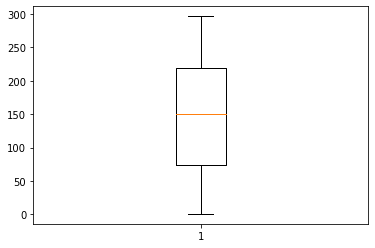

In [145]:
plt.boxplot(data["TV"])
plt.show()

In [147]:
data["TV"].min()

0.7

In [148]:
data["TV"].max()

296.4

In [149]:
data["TV"].median()

149.75

In [150]:
data[["TV"]].quantile(0.25)

TV    74.375
Name: 0.25, dtype: float64